In [1]:
import shutil # copy and move files
import os # check directory existence, check 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
SEED = 42

# Copy files

## raw data

In [2]:
raw_data = pd.read_csv('./data/_oglcnac_database.csv')
raw_data.sample(10, random_state=SEED)

,UniprotKB ID,Entry name,organism,full name,oglcnacscore,oglcnac sites,phosphorylation sites,PMIDS,sequence
9798,Q6P582,MZT2A_HUMAN,Homo sapiens,Mitotic-spindle organizing protein 2A,6.287639,NaN,S34;S152,34019948,MAAQGVGPGPGSAAPPGLEAARQKLALRRKKVLSTEEMELYELAQA...
12902,Q99538,LGMN_HUMAN,Homo sapiens,Legumain,11.677173,S10,NaN,23301498;34019948;29351928,MVWKVAVFLSVALGIGAVPIDDPEDGGKHWVVIVAGSNGWYNYRHQ...
2589,O61735,CLOCK_DROME,Drosophila melanogaster,Circadian locomoter output cycles protein kaput,18.146602,NaN,NaN,15186484,MDDESDDKDDTKSFLCRKSRNLSEKKRRDQFNSLVNDLSALISTSS...
12584,Q96G74,OTUD5_HUMAN,Homo sapiens,OTU domain-containing protein 5,9.735110,NaN,S64;S165;T175;S177;S452;T507,23301498;28510447,MTILPKKKPPPPDADPANEPPPPGPMPPAPRRGGGVGVGGGGTGVG...
15418,Q9Y2M0,FAN1_HUMAN,Homo sapiens,Fanconi-associated nuclease 1,6.005927,NaN,S180,30379171,MMSEGKPPDKKRPRRSLSISKNKKKASNSIISCFNNAPPAKLACPV...
12371,Q941Q3,C3H37_ARATH,Arabidopsis thaliana,Zinc finger CCCH domain-containing protein 37,13.157209,NaN,NaN,28154133,MAHRQLYSYALQPSYAAAASTVSPAPPPPQQPLPPKTGLSSLYGSS...
5885,P61571,REC21_HUMAN,Homo sapiens,Endogenous retrovirus group K member 21 Rec pr...,6.005927,NaN,NaN,30379171,MHPSEMQRKAPPRRRRHRNRAPLTHKMNKMVTSEQMKLPSTKKAEP...
7600,Q2QGD7,ZXDC_HUMAN,Homo sapiens,Zinc finger protein ZXDC,6.005927,NaN,S34;T172;S665,30379171,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...
8054,Q4CY08,Q4CY08_TRYCC,Trypanosoma cruzi,NaN,7.585376,NaN,NaN,30984116,FMRHIELAVESGSVMLMGFDVNVALNVKVDNRPEPCHFAIVIGMDQ...
4475,P28838,AMPL_HUMAN,Homo sapiens,Cytosol aminopeptidase,11.043056,NaN,S42;S54;S180;S194;S238,34725712;34229054;28510447;35138101,MFLLPLPAAGRVVVRRLAVRRFGSRSLSTADMTKGLVLGIYSKEKE...


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniprotKB ID           16762 non-null  object 
 1   Entry name             16758 non-null  object 
 2   organism               16758 non-null  object 
 3   full name              13872 non-null  object 
 4   oglcnacscore           16758 non-null  float64
 5   oglcnac sites          4583 non-null   object 
 6   phosphorylation sites  8233 non-null   object 
 7   PMIDS                  16758 non-null  object 
 8   sequence               16758 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


## all o-glcnacylated data

In [4]:
oglcnac_data = raw_data[~raw_data['oglcnac sites'].isnull()] # select o-glcnacylated proteins
oglcnac_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4583 entries, 6 to 16753
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniprotKB ID           4583 non-null   object 
 1   Entry name             4583 non-null   object 
 2   organism               4583 non-null   object 
 3   full name              4443 non-null   object 
 4   oglcnacscore           4583 non-null   float64
 5   oglcnac sites          4583 non-null   object 
 6   phosphorylation sites  3136 non-null   object 
 7   PMIDS                  4583 non-null   object 
 8   sequence               4583 non-null   object 
dtypes: float64(1), object(8)
memory usage: 358.0+ KB


**Mammalian species**:

1. HUMAN: Homo sapiens. - This refers to us, humans. Many studies, especially in the latter stages of medical research, are done on human cells, tissues, or volunteers to understand human-specific mechanisms and for clinical trials. - Humans are the most common and widespread species of primate. They are characterized by their hairlessness, bipedalism, and high intelligence. Humans have a large brain and resulting cognitive skills that enable them to thrive in varied environments and develop complex societies and civilizations. Anatomically modern humans emerged around 300,000 years ago in Africa.

1. MOUSE: Mus musculus. - The laboratory mouse is one of the most widely used model organisms in biology and genetics. They share 95% of their genes with humans, reproduce quickly, and are small and easy to keep, making them an excellent model for human disease. - The house mouse is a small rodent, known for its pointed snout, small rounded ears, a body-length scaly tail, and a high breeding rate. The common house mouse is also popular as pets. In some places, certain kinds of field mice are locally common.

1. PIG: - Sus scrofa domesticus. Pigs are used in research for various purposes. They are particularly valuable in translational research because of the physiological and anatomical similarities with humans, especially in the cardiovascular system. - Pigs are domesticated, omnivorous mammals. They are variously considered a subspecies of Sus scrofa (the wild boar or Eurasian boar) or a distinct species. The pig’s head-plus-body length ranges from 0.9 to 1.8 m (3 to 6 ft), and adult pigs typically weigh between 50 and 350 kg (110 and 770 lb).

1. RAT: Rattus norvegicus. - Rats are another common model organism, particularly in neuroscience, because their brains and nervous systems are more complex and closer in some aspects to humans than mice. - Rats are medium-sized, long-tailed rodents. The best-known rat species are the black rat (Rattus rattus) and the brown rat (Rattus norvegicus). This group, generally known as the Old World rats or true rats, originated in Asia5. Rats are bigger than most Old World mice, which are their relatives, but seldom weigh over 500 grams (17½ oz) in the wild.

## o-glcnacylated mammalian data

In [5]:
def entry_class(x): # return True value if mammalian species 
    if x[-5:] in ['HUMAN', 'MOUSE']:
        return True
    
    elif x[-3:] in ['PIG', 'RAT']:
        return True
    
    else:
        return False

mammalian_data = oglcnac_data[oglcnac_data['Entry name'].apply(entry_class)] # select o-glcnacylated mammalian proteins
mammalian_data = mammalian_data[['UniprotKB ID', 'organism', 'oglcnacscore', 'oglcnac sites', 'sequence']].reset_index(drop=True) # select useful columns
mammalian_species = mammalian_data.organism.unique() # to check if data only include four mammalian species (Human:Homo sapiens, Mouse:Mus musculus, Pig:Sus scrofa domesticus, Rat:Rattus norvegicus)

print('Organisms:', dict(zip(range(len(mammalian_species)), mammalian_species)))
mammalian_data.sample(10, random_state=SEED)

Organisms: {0: 'Homo sapiens', 1: 'Mus musculus', 2: 'Rattus norvegicus', 3: 'Sus scrofa'}


,UniprotKB ID,organism,oglcnacscore,oglcnac sites,sequence
1634,Q00587,Homo sapiens,12.207032,S132,MPGPQGGRGAATMSLGKLSPVGWVSSSQGKRRLTADMISHPLGDFR...
3687,Q9BQC3,Homo sapiens,27.611586,T467;T470;S474,MESMFSSPAEAALQRETGVPGLLTPLPDLDGVYELERVAGFVRDLG...
4244,Q9UIJ7,Homo sapiens,11.665506,S18,MGASARLLRAVIMGAPGSGKGTVSSRITTHFELKHLSSGDLLRDNM...
4005,Q9NQ66,Homo sapiens,6.005927,T187;S473,MAGAQPGVHALQLKPVCVSDSLKKGTKFVKWDDDSTIVTPIILRTD...
468,O75152,Homo sapiens,5.077726,T382;T443;S543;T579,MPNQGEDCYFFFYSTCTKGDSCPFRHCEAAIGNETVCTLWQEGRCF...
3042,Q8N135,Homo sapiens,12.716548,S337,MGGAGILLLLLAGAGVVVAWRPPKGKCPLRCSCSKDSALCEGSPDL...
1910,Q14247,Homo sapiens,18.858372,S11;T240;S277;S322;T323;T328;S331;S332;S345;T401,MWKASAGHAVSIAQDDAGADDWETDPDFVNDVSEKEQRWGAKTVQG...
151,E9Q555,Mus musculus,11.752367,S1202;S1206,MECPQCGHVSSEKAPKFCSECGQKLPSAATVQGDLKNDNTLVVSST...
3896,Q9H4A4,Homo sapiens,16.163186,S60;S247,MASGEHSPGSGAARRPLHSAQAVDVASASNFRAFELLHLHLDLRAE...
2749,Q80TE4,Mus musculus,20.868470,T1702;T1704,MSDPRPSQAEKHKLGRAAAKLKDPSRTMQADDYFARKFKAINGSMG...


In [6]:
def get_int(list_site_str):
    return [int(x[1:]) if len(x) < 8 else int(x.split(' ')[0][1:]) for x in list_site_str] # remove either S or T, Example of a format with long string: 'S119 (Q92993-3)'
    
mammalian_int = mammalian_data.copy()
mammalian_int['oglcnac sites'] = mammalian_data['oglcnac sites'].apply(lambda x: x.split(';')).apply(get_int) # transform [S489;T821] -> [285, 871]
mammalian_int['sequence'] = mammalian_int.sequence.apply(lambda x: x.replace(' ', '')) # remove space at the end of the sequence
mammalian_int.sample(10, random_state=SEED)

,UniprotKB ID,organism,oglcnacscore,oglcnac sites,sequence
1634,Q00587,Homo sapiens,12.207032,[132],MPGPQGGRGAATMSLGKLSPVGWVSSSQGKRRLTADMISHPLGDFR...
3687,Q9BQC3,Homo sapiens,27.611586,"[467, 470, 474]",MESMFSSPAEAALQRETGVPGLLTPLPDLDGVYELERVAGFVRDLG...
4244,Q9UIJ7,Homo sapiens,11.665506,[18],MGASARLLRAVIMGAPGSGKGTVSSRITTHFELKHLSSGDLLRDNM...
4005,Q9NQ66,Homo sapiens,6.005927,"[187, 473]",MAGAQPGVHALQLKPVCVSDSLKKGTKFVKWDDDSTIVTPIILRTD...
468,O75152,Homo sapiens,5.077726,"[382, 443, 543, 579]",MPNQGEDCYFFFYSTCTKGDSCPFRHCEAAIGNETVCTLWQEGRCF...
3042,Q8N135,Homo sapiens,12.716548,[337],MGGAGILLLLLAGAGVVVAWRPPKGKCPLRCSCSKDSALCEGSPDL...
1910,Q14247,Homo sapiens,18.858372,"[11, 240, 277, 322, 323, 328, 331, 332, 345, 401]",MWKASAGHAVSIAQDDAGADDWETDPDFVNDVSEKEQRWGAKTVQG...
151,E9Q555,Mus musculus,11.752367,"[1202, 1206]",MECPQCGHVSSEKAPKFCSECGQKLPSAATVQGDLKNDNTLVVSST...
3896,Q9H4A4,Homo sapiens,16.163186,"[60, 247]",MASGEHSPGSGAARRPLHSAQAVDVASASNFRAFELLHLHLDLRAE...
2749,Q80TE4,Mus musculus,20.868470,"[1702, 1704]",MSDPRPSQAEKHKLGRAAAKLKDPSRTMQADDYFARKFKAINGSMG...


In [7]:
mammalian_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniprotKB ID   4501 non-null   object 
 1   organism       4501 non-null   object 
 2   oglcnacscore   4501 non-null   float64
 3   oglcnac sites  4501 non-null   object 
 4   sequence       4501 non-null   object 
dtypes: float64(1), object(4)
memory usage: 175.9+ KB


In [8]:
len(mammalian_int['UniprotKB ID'].unique())

4501

In [9]:
mammalian_int.to_csv('./data/oglcnacome_sites.csv')
mammalian_int.to_pickle('./data/oglcnacome_sites.pkl')

In [10]:
database = pd.read_csv('./data/oglcnacome_sites.csv', index_col=0)
database.sample(10, random_state=SEED)

,UniprotKB ID,organism,oglcnacscore,oglcnac sites,sequence
1634,Q00587,Homo sapiens,12.207032,[132],MPGPQGGRGAATMSLGKLSPVGWVSSSQGKRRLTADMISHPLGDFR...
3687,Q9BQC3,Homo sapiens,27.611586,"[467, 470, 474]",MESMFSSPAEAALQRETGVPGLLTPLPDLDGVYELERVAGFVRDLG...
4244,Q9UIJ7,Homo sapiens,11.665506,[18],MGASARLLRAVIMGAPGSGKGTVSSRITTHFELKHLSSGDLLRDNM...
4005,Q9NQ66,Homo sapiens,6.005927,"[187, 473]",MAGAQPGVHALQLKPVCVSDSLKKGTKFVKWDDDSTIVTPIILRTD...
468,O75152,Homo sapiens,5.077726,"[382, 443, 543, 579]",MPNQGEDCYFFFYSTCTKGDSCPFRHCEAAIGNETVCTLWQEGRCF...
3042,Q8N135,Homo sapiens,12.716548,[337],MGGAGILLLLLAGAGVVVAWRPPKGKCPLRCSCSKDSALCEGSPDL...
1910,Q14247,Homo sapiens,18.858372,"[11, 240, 277, 322, 323, 328, 331, 332, 345, 401]",MWKASAGHAVSIAQDDAGADDWETDPDFVNDVSEKEQRWGAKTVQG...
151,E9Q555,Mus musculus,11.752367,"[1202, 1206]",MECPQCGHVSSEKAPKFCSECGQKLPSAATVQGDLKNDNTLVVSST...
3896,Q9H4A4,Homo sapiens,16.163186,"[60, 247]",MASGEHSPGSGAARRPLHSAQAVDVASASNFRAFELLHLHLDLRAE...
2749,Q80TE4,Mus musculus,20.868470,"[1702, 1704]",MSDPRPSQAEKHKLGRAAAKLKDPSRTMQADDYFARKFKAINGSMG...


# generate integrated dataset for machine learning model

## determine protein list

In [11]:
'''
We have three types of dataset:
 1. positivity of O-GlcNAcylation for every single location
 2. secondary structure
 3. augmented features (local environment)
'''

database_proteins = set(database['UniprotKB ID'].unique())
print(len(database_proteins), 'O-GlcNAcylated proteins in O-GlcNAcome database')

4501 O-GlcNAcylated proteins in O-GlcNAcome database


In [12]:
augmented_dir = './data/_augmented_features'

# get the list of augmented proteins of which names consist of multiple elements (e.g. A0A024RAY2_P05783)
multiple_id = [x[:-4] for x in os.listdir(augmented_dir) if x[-3:] == 'csv' and len(x.split('_')) > 1]
print(len(multiple_id), 'proteins that have multiple IDs in augmented feature directory:\n', multiple_id)

# copy files 
for protein_id in multiple_id:
    elements = protein_id.split('_')
    
    for element in elements:
        element_path = f'{augmented_dir}/{element}.csv' 
        if not os.path.exists(element_path):
            shutil.copyfile(f'{augmented_dir}/{protein_id}.csv',
                            element_path)

7 proteins that have multiple IDs in augmented feature directory:
 ['A0A024RAY2_P05783', 'P0CG62_P0CG49', 'P24622_2', 'P63249_P63248', 'P68406_P24622_2', 'Q4R561_P60710', 'Q9WVB1_P35279']


In [13]:
proteins = [x[:-4] for x in os.listdir(augmented_dir) if x[-3:] == 'csv']
print(len(proteins), 'proteins at the augmented feature directory:', )

# check if each protein exists in the O-GlcNAcome database
augmented_proteins = []
augmented_proteins_x = []
for protein_id in proteins:
    if protein_id in database_proteins and protein_id not in augmented_proteins:
        augmented_proteins.append(protein_id)
    else:
        augmented_proteins_x.append(protein_id)
        
print(f'{len(augmented_proteins_x)} proteins do not exist in the O-GlcNacome database')
print('removed proteins (10 samples):', augmented_proteins_x[:10])
print()
      
print(len(augmented_proteins), 'proteins at the augmented feature directory')

128 proteins at the augmented feature directory:
22 proteins do not exist in the O-GlcNacome database
removed proteins (10 samples): ['2', 'A0A024RAY2', 'A0A024RAY2_P05783', 'E9K9Z1', 'O08984', 'P02470', 'P02488', 'P02505', 'P04799', 'P05451']

106 proteins at the augmented feature directory


In [14]:
secondary_dir = './data/_secondary_structure'

# check if proteins at feature directory also exist in secondary directory
check_proteins = []
check_proteins_x = []
for protein_id in augmented_proteins:
    if protein_id in [x.split('_')[0] for x in os.listdir(f'{secondary_dir}/dynamine_results')] and \
       protein_id in [x.split('.')[0] for x in os.listdir(f'{secondary_dir}/spider3_results')]:
        check_proteins.append(protein_id)
    else:
        check_proteins_x.append(protein_id)
        
print(f'{len(check_proteins_x)} proteins do not exist in the augmented feature directory')
print('removed proteins (10 samples):', check_proteins_x[:10])
print()
      
print(len(check_proteins), 'proteins at the secondary structure directory')

1 proteins do not exist in the augmented feature directory
removed proteins (10 samples): ['P24622']

105 proteins at the secondary structure directory


## concatenate positivity, secondary, and augmented data

In [16]:
from mauri_feature import *


# Final step, check if proteins have same sequence at all directories
new_dir = './data/integrated_features'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

all_proteins = []
all_datasets = []
augmented_names = list(pd.read_csv('./data/_names_augmented_features.csv', header=None).values.squeeze())
for protein_id in check_proteins:
    ## process positivity data
    database_data =  database[database['UniprotKB ID'] == protein_id]
    positivity = sequence_with_positivity(database_data)
    
    
    ## process basic features
    # process flexibility data
    flexibility = pd.read_fwf(f"./data/_secondary_structure/dynamine_results/{protein_id}_backbone.pred", header=None, names=['flexibility']).iloc[11:].reset_index(drop=True)
    flexibility = flexibility['flexibility'].apply(lambda x: x.split()[1]).to_frame().astype({'flexibility':float})
    
    # process secondary structure data
    temp   = pd.read_csv(f"./data/_secondary_structure/spider3_results/{protein_id}.spd33")
    columns = temp.columns[0].split()
    secondary = pd.DataFrame(columns=columns)
    for i, column in enumerate(columns):
        secondary[column] = temp.iloc[:,0].apply(lambda x: x.split()[i])
        if i >= 3:
            secondary[column] = secondary[column].astype('float')

    assert len(positivity) == len(secondary) == len(flexibility), 'Lengths do not match between mauri and positivity data'
    basic = positivity.copy()
    sequence = basic['residue'].sum()
    
    # make window for easier feature computation
    basic['window'] = pd.Series([make_window(basic['residue'].sum(), x) for x in basic.index])
    # side chain -1 to 5
    for num in range(-1, 6):
        if num != 0:
            basic[f'side_{num}'] = basic.window.apply(lambda x: mauri_side(x, num))
    
    # non-polar aliphatic -3 to -1
    basic['npa(-3,-1)'] = basic.window.apply(mauri_npa)
    
    # polar positive -7 to -5
    basic['ppo(-7,-5)'] = basic.window.apply(mauri_ppo)
    
    # number of S and T -10 to 10
    basic['n(S/T)'] = basic.window.apply(mauri_st)
    
    # flexibility
    basic = pd.concat([basic, flexibility], axis=1)
    
    # secondary structure
    basic['ss'] = secondary['SS']
    
    # presence of proline at +1
    basic['p(1)'] = basic.window.apply(is_proline)
    
    # secondary structure by phi and psi
    basic['ss_angle'] = secondary.apply(lambda x: ss_angle(x['Phi'], x['Psi']), axis=1)
    basic = basic.drop(['window'], axis=1)

    
    ## process augmented features
    augmented = pd.read_csv(f'{augmented_dir}/{protein_id}.csv', sep=' ', header=None)
    assert len(augmented_names) == len(augmented.columns)
    assert len(basic) == len(augmented)
    
    augmented.columns = augmented_names
    augmented = augmented.drop([f'resid_{x}A' for x in range(0, 26, 5)], axis=1) # remove duplicated columns
    
    augmented = pd.concat([basic, augmented], axis=1)
    
    
    if augmented.isnull().sum().sum() == 0: # check and remove if there are any null values
        augmented.to_csv(f'{new_dir}/{protein_id}.csv', index=False)
        all_proteins.append(protein_id)
        all_datasets.append(augmented)
        
    else: 
        print(f'{protein_id} has {augmented.isnull().sum().sum()} null values')
        continue
    
all_datasets = pd.concat(all_datasets, axis=0)
print('total number of proteins:', len(check_proteins), '-->', len(all_proteins))

P26039 has 101972 null values
total number of proteins: 105 --> 104


In [17]:
all_columns = list(all_datasets.columns)

for idx, column in enumerate(all_columns):
    print(f'{idx:>3} {column}')

  0 residue
  1 positivity
  2 side_-1
  3 side_1
  4 side_2
  5 side_3
  6 side_4
  7 side_5
  8 npa(-3,-1)
  9 ppo(-7,-5)
 10 n(S/T)
 11 flexibility
 12 ss
 13 p(1)
 14 ss_angle
 15 number_hydrophobic_0A
 16 number_hydrophilic_0A
 17 number_polar_0A
 18 number_aromatic_0A
 19 number_aliphatic_0A
 20 number_charged_0A
 21 number_positive_0A
 22 number_negative_0A
 23 number_gly_0A
 24 number_very_small_0A
 25 number_small_0A
 26 number_normal_0A
 27 number_long_0A
 28 number_pro_0A
 29 number_A_polar_uncharged_with_hydroxyl_group_0A
 30 number_b_polar_uncharged_with_amide_0A
 31 number_d_negatively_charged_polar_0A
 32 number_e_non_polar_suffered_0A
 33 number_f_non_polar_aromatic_0A
 34 number_ala_0A
 35 number_cys_0A
 36 number_asp_0A
 37 number_glu_0A
 38 number_phe_0A
 39 number_his_0A
 40 number_ile_0A
 41 number_lys_0A
 42 number_leu_0A
 43 number_met_0A
 44 number_asn_0A
 45 number_gln_0A
 46 number_arg_0A
 47 number_ser_0A
 48 number_thr_0A
 49 number_val_0A
 50 number_trp_0A


In [18]:
# find identical columns
df = all_datasets.copy()

duplicates = []
for i in range(df.shape[1]):
    for j in range(i+1, df.shape[1]):
        if df.iloc[:,i].equals(df.iloc[:,j]):
            duplicates.append((df.columns[i], df.columns[j]))

# print identical columns
if len(duplicates) == 0:
    print("No identical columns found.")
else:
    print("Identical columns:")
    for dup in duplicates:
        print(f"{dup[0]} and {dup[1]}")

Identical columns:
number_aromatic_0A and number_f_non_polar_aromatic_0A
number_negative_0A and number_d_negatively_charged_polar_0A
sasa_aromatic_0A and sasa_f_non_polar_aromatic_0A
sasa_negative_0A and sasa_d_negatively_charged_polar_0A
number_aromatic_5A and number_f_non_polar_aromatic_5A
number_negative_5A and number_d_negatively_charged_polar_5A
sasa_aromatic_5A and sasa_f_non_polar_aromatic_5A
sasa_negative_5A and sasa_d_negatively_charged_polar_5A
number_aromatic_10A and number_f_non_polar_aromatic_10A
number_negative_10A and number_d_negatively_charged_polar_10A
sasa_aromatic_10A and sasa_f_non_polar_aromatic_10A
sasa_negative_10A and sasa_d_negatively_charged_polar_10A
number_aromatic_15A and number_f_non_polar_aromatic_15A
number_negative_15A and number_d_negatively_charged_polar_15A
sasa_aromatic_15A and sasa_f_non_polar_aromatic_15A
sasa_negative_15A and sasa_d_negatively_charged_polar_15A
number_aromatic_20A and number_f_non_polar_aromatic_20A
number_negative_20A and numbe

# data analysis

In [19]:
ST_all = all_datasets[ (all_datasets['residue'] == 'S') | (all_datasets['residue'] == 'T')]
ST_pos = ST_all[ST_all['positivity'] == 1]
ST_neg = ST_all[ST_all['positivity'] == 0]
S_pos  = ST_pos[ST_pos['residue'] == 'S']
T_pos  = ST_pos[ST_pos['residue'] == 'T']

print(len(all_proteins), 'proteins')
print(len(ST_pos), 'positives:', len(S_pos), 'S', len(T_pos), 'T')
print(len(ST_neg), 'negatives')
print(round(len(ST_pos) / len(ST_neg) * 100, 2), '%')

104 proteins
428 positives: 272 S 156 T
11100 negatives
3.86 %


## residues

In [20]:
all_residue = all_datasets['residue'].value_counts() / len(all_datasets)

print('For all residues')
display(all_residue.round(2))

For all residues


residue
S    0.10
L    0.08
A    0.08
E    0.08
P    0.07
G    0.07
V    0.06
T    0.06
K    0.06
R    0.06
Q    0.05
D    0.05
I    0.04
N    0.03
F    0.03
H    0.02
Y    0.02
M    0.02
C    0.02
W    0.01
Name: count, dtype: float64

In [21]:
def residue_side(window, side_num): 
    left, center, right = window.split('"')[0], window.split('"')[1], window.split('"')[2]
    if side_num < 0:
        return left[side_num]
    elif side_num > 0:
        return right[side_num - 1]
    else:
        return center
    
def make_side_df(side_range = (-10, 11), df_index = list(mauri_properties.keys()) + ['O']):
    sides = pd.concat([pd.Series(np.zeros(side_range[1] - side_range[0]), index = df_index) for _ in range(*side_range)], axis=1)
    sides.columns = [f'side_{num}' for num in range(*side_range)]
    return sides

In [22]:
zeros = pd.Series(np.zeros(21), index = list(mauri_properties.keys()) + ['O'])

S_sides = make_side_df()
S_pos_sides = make_side_df()
S_neg_sides = make_side_df()
S_num = 0
S_pos_num = 0
S_neg_num = 0

T_sides = make_side_df()
T_pos_sides = make_side_df()
T_neg_sides = make_side_df()
T_num = 0
T_pos_num = 0
T_neg_num = 0

for protein_id in all_proteins:
    data = pd.read_csv(f'{new_dir}/{protein_id}.csv', header=0)[['residue', 'positivity']]
    data['window'] = pd.Series([make_window(data['residue'].sum(), x) for x in data.index])
    
    S_data     = data[data['residue'] == 'S']
    S_pos_data = data[(data['residue'] == 'S') & (data['positivity'] == 1)]
    S_neg_data = data[(data['residue'] == 'S') & (data['positivity'] == 0)]
    S_num     += len(S_data)
    S_pos_num += len(S_pos_data)
    S_neg_num += len(S_neg_data)
    
    T_data     = data[data['residue'] == 'T']
    T_pos_data = data[(data['residue'] == 'T') & (data['positivity'] == 1)]
    T_neg_data = data[(data['residue'] == 'T') & (data['positivity'] == 0)]
    T_num     += len(T_data)
    T_pos_num += len(T_pos_data)
    T_neg_num += len(T_neg_data)
        
    for side_num in range(-10, 11):
        S_sides[f'side_{side_num}']     += (S_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        S_pos_sides[f'side_{side_num}'] += (S_pos_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        S_neg_sides[f'side_{side_num}'] += (S_neg_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        
        T_sides[f'side_{side_num}']     += (T_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        T_pos_sides[f'side_{side_num}'] += (T_pos_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        T_neg_sides[f'side_{side_num}'] += (T_neg_data['window'].apply(lambda x: residue_side(x, side_num)).value_counts() + zeros).fillna(0)
        
S_sides     = (S_sides / S_num).round(2)
S_pos_sides = (S_pos_sides / S_pos_num).round(2)
S_neg_sides = (S_neg_sides / S_neg_num).round(2)

T_sides     = (T_sides / T_num).round(2)
T_pos_sides = (T_pos_sides / T_pos_num).round(2)
T_neg_sides = (T_neg_sides / T_neg_num).round(2)

In [23]:
def plot_all_pos_neg(side_num, sides, pos_sides, neg_sides, y_lim, bar_width = 0.2):
    data     =     sides[[f'side_{side_num}']].drop(['O'], axis=0)
    data_pos = pos_sides[[f'side_{side_num}']].drop(['O'], axis=0)
    data_neg = neg_sides[[f'side_{side_num}']].drop(['O'], axis=0)

    x_ticks_1 = np.arange(len(data))
    x_ticks_2 = x_ticks_1 + bar_width + 0.02
    x_ticks_3 = x_ticks_2 + bar_width + 0.02
    
    plt.bar(x_ticks_1, data.values.squeeze(),     color = 'k', label = 'all', width = bar_width)
    plt.bar(x_ticks_2, data_pos.values.squeeze(), color = 'b', label = 'pos', width = bar_width, )
    plt.bar(x_ticks_3, data_neg.values.squeeze(), color = 'r', label = 'neg', width = bar_width)
    
    plt.title(f'Side {side_num}')
    plt.xticks(x_ticks_2, labels=data.index)
    plt.ylim(*y_lim)
    plt.legend()
    
def plot_pos_neg_ratio(side_num, sides, pos_sides, neg_sides, y_lim, bar_width = 0.6):
    data = ((pos_sides - neg_sides) / sides * 100).round(2)[[f'side_{side_num}']].drop(['O'], axis=0)
    colors = ['r' if x < 0 else 'b' for x in data.values.squeeze()]
    x_ticks = np.arange(len(data))
    
    plt.bar(x_ticks, data.values.squeeze(), label = 'all', width = bar_width, color = colors)
    
    plt.title(f'Side {side_num}')
    plt.xticks(x_ticks, labels=data.index)
    plt.ylim(*y_lim)
    plt.legend()

### Serine sites

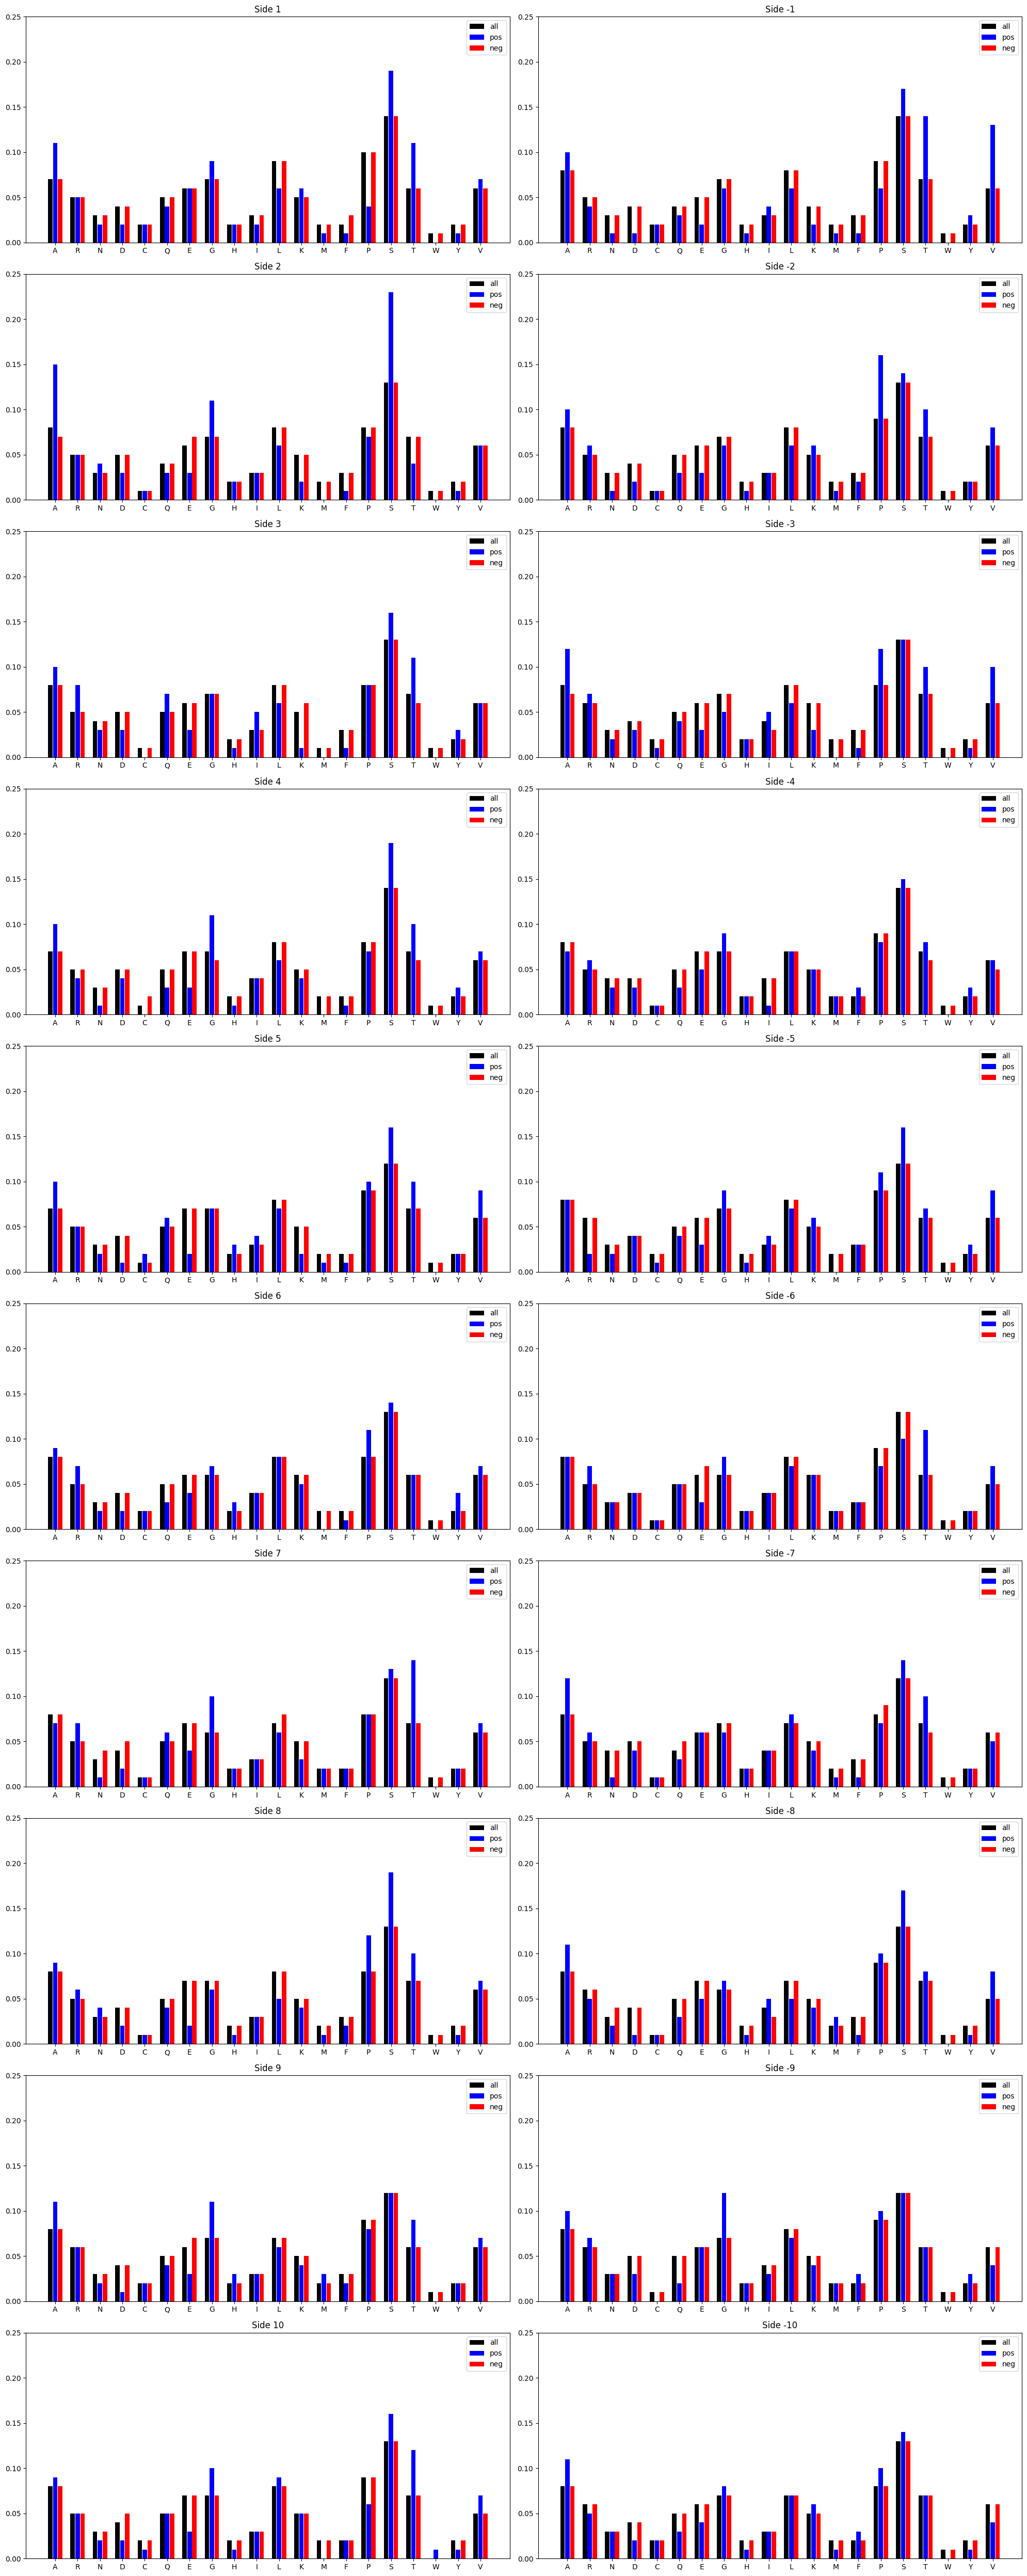

In [24]:
plt.figure(figsize=(10*2,5*10))

for side_num in range(1, 11):
    plt.subplot(10, 2, 2*side_num-1)
    plot_all_pos_neg(side_num, S_sides, S_pos_sides, S_neg_sides, (0, 0.25))

    plt.subplot(10, 2, 2*side_num)
    plot_all_pos_neg(-side_num, S_sides, S_pos_sides, S_neg_sides, (0, 0.25))
    
plt.tight_layout()
plt.show()

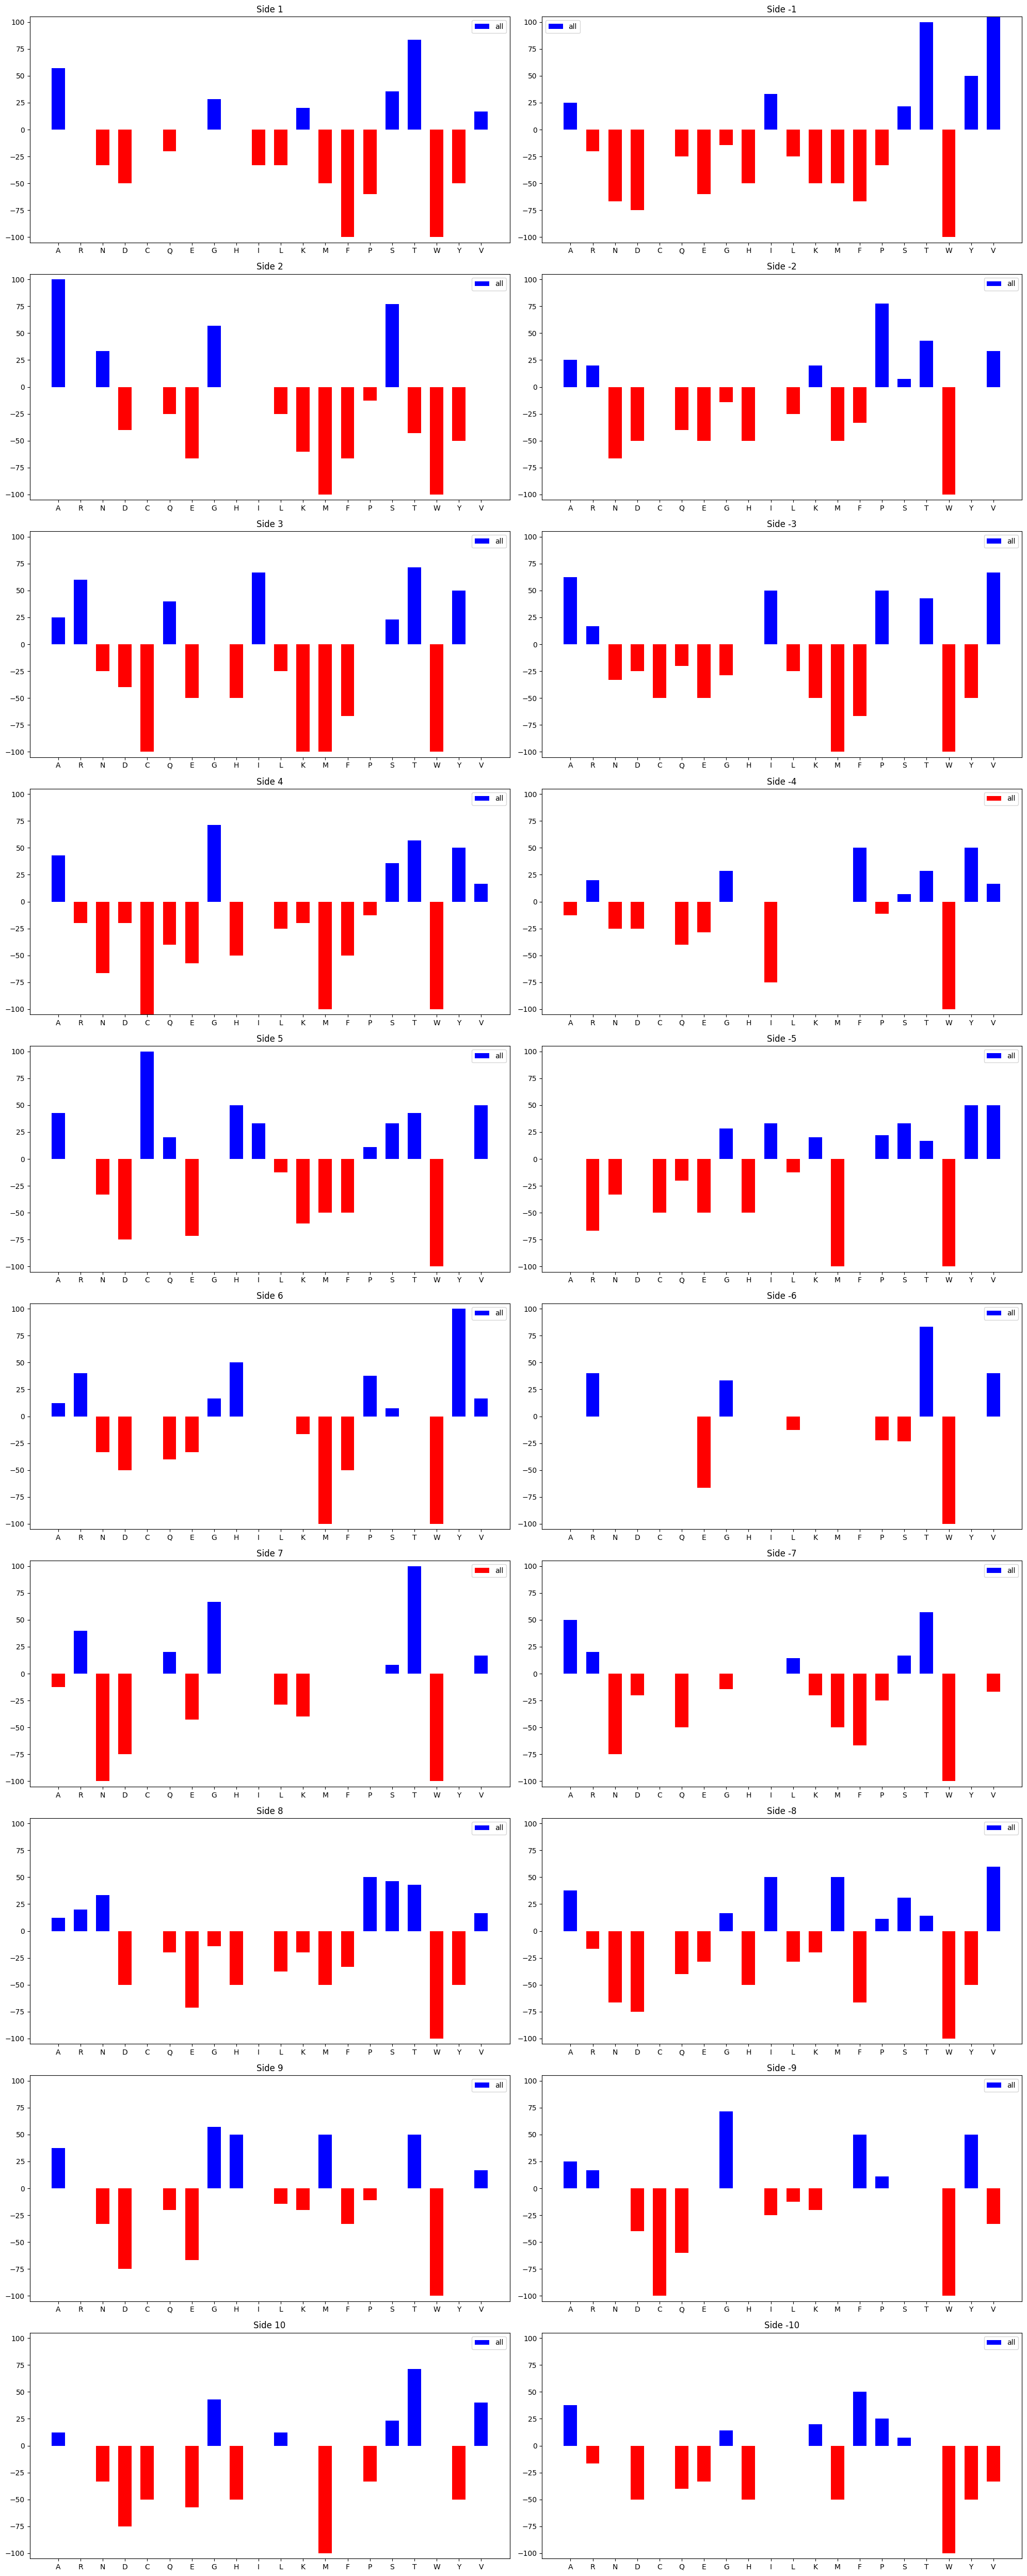

In [25]:
plt.figure(figsize=(10*2,5*10))

for side_num in range(1, 11):
    plt.subplot(10, 2, 2*side_num-1)
    plot_pos_neg_ratio(side_num, S_sides, S_pos_sides, S_neg_sides, (-105, 105))

    plt.subplot(10, 2, 2*side_num)
    plot_pos_neg_ratio(-side_num, S_sides, S_pos_sides, S_neg_sides, (-105, 105))
    
plt.tight_layout()
plt.show()

### Threonine sites

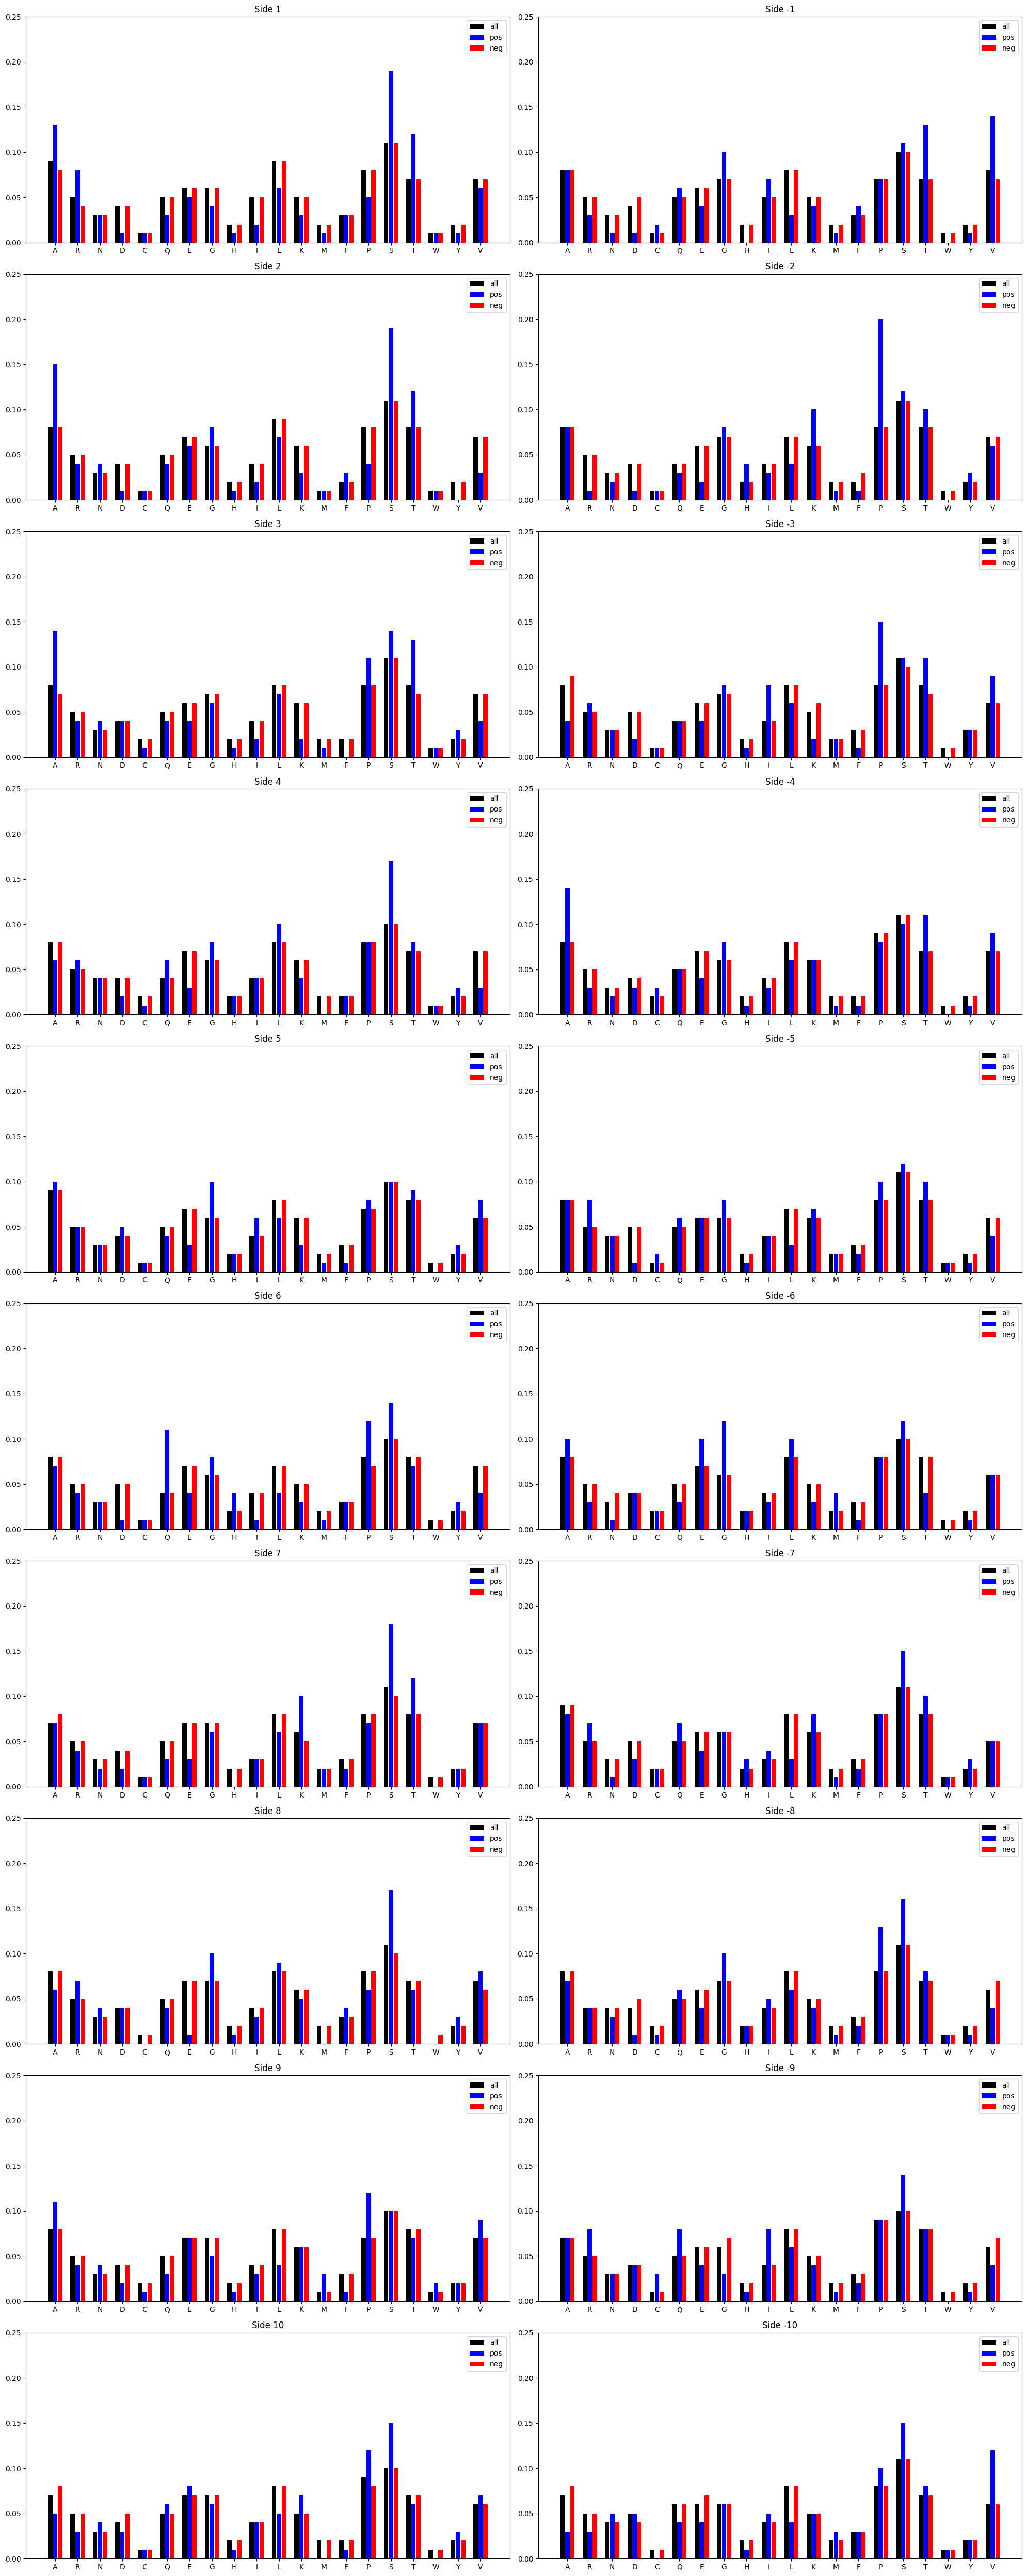

In [26]:
plt.figure(figsize=(10*2,5*10))

for side_num in range(1, 11):
    plt.subplot(10, 2, 2*side_num-1)
    plot_all_pos_neg(side_num, T_sides, T_pos_sides, T_neg_sides, (0, 0.25))

    plt.subplot(10, 2, 2*side_num)
    plot_all_pos_neg(-side_num, T_sides, T_pos_sides, T_neg_sides, (0, 0.25))
    
plt.tight_layout()
plt.show()

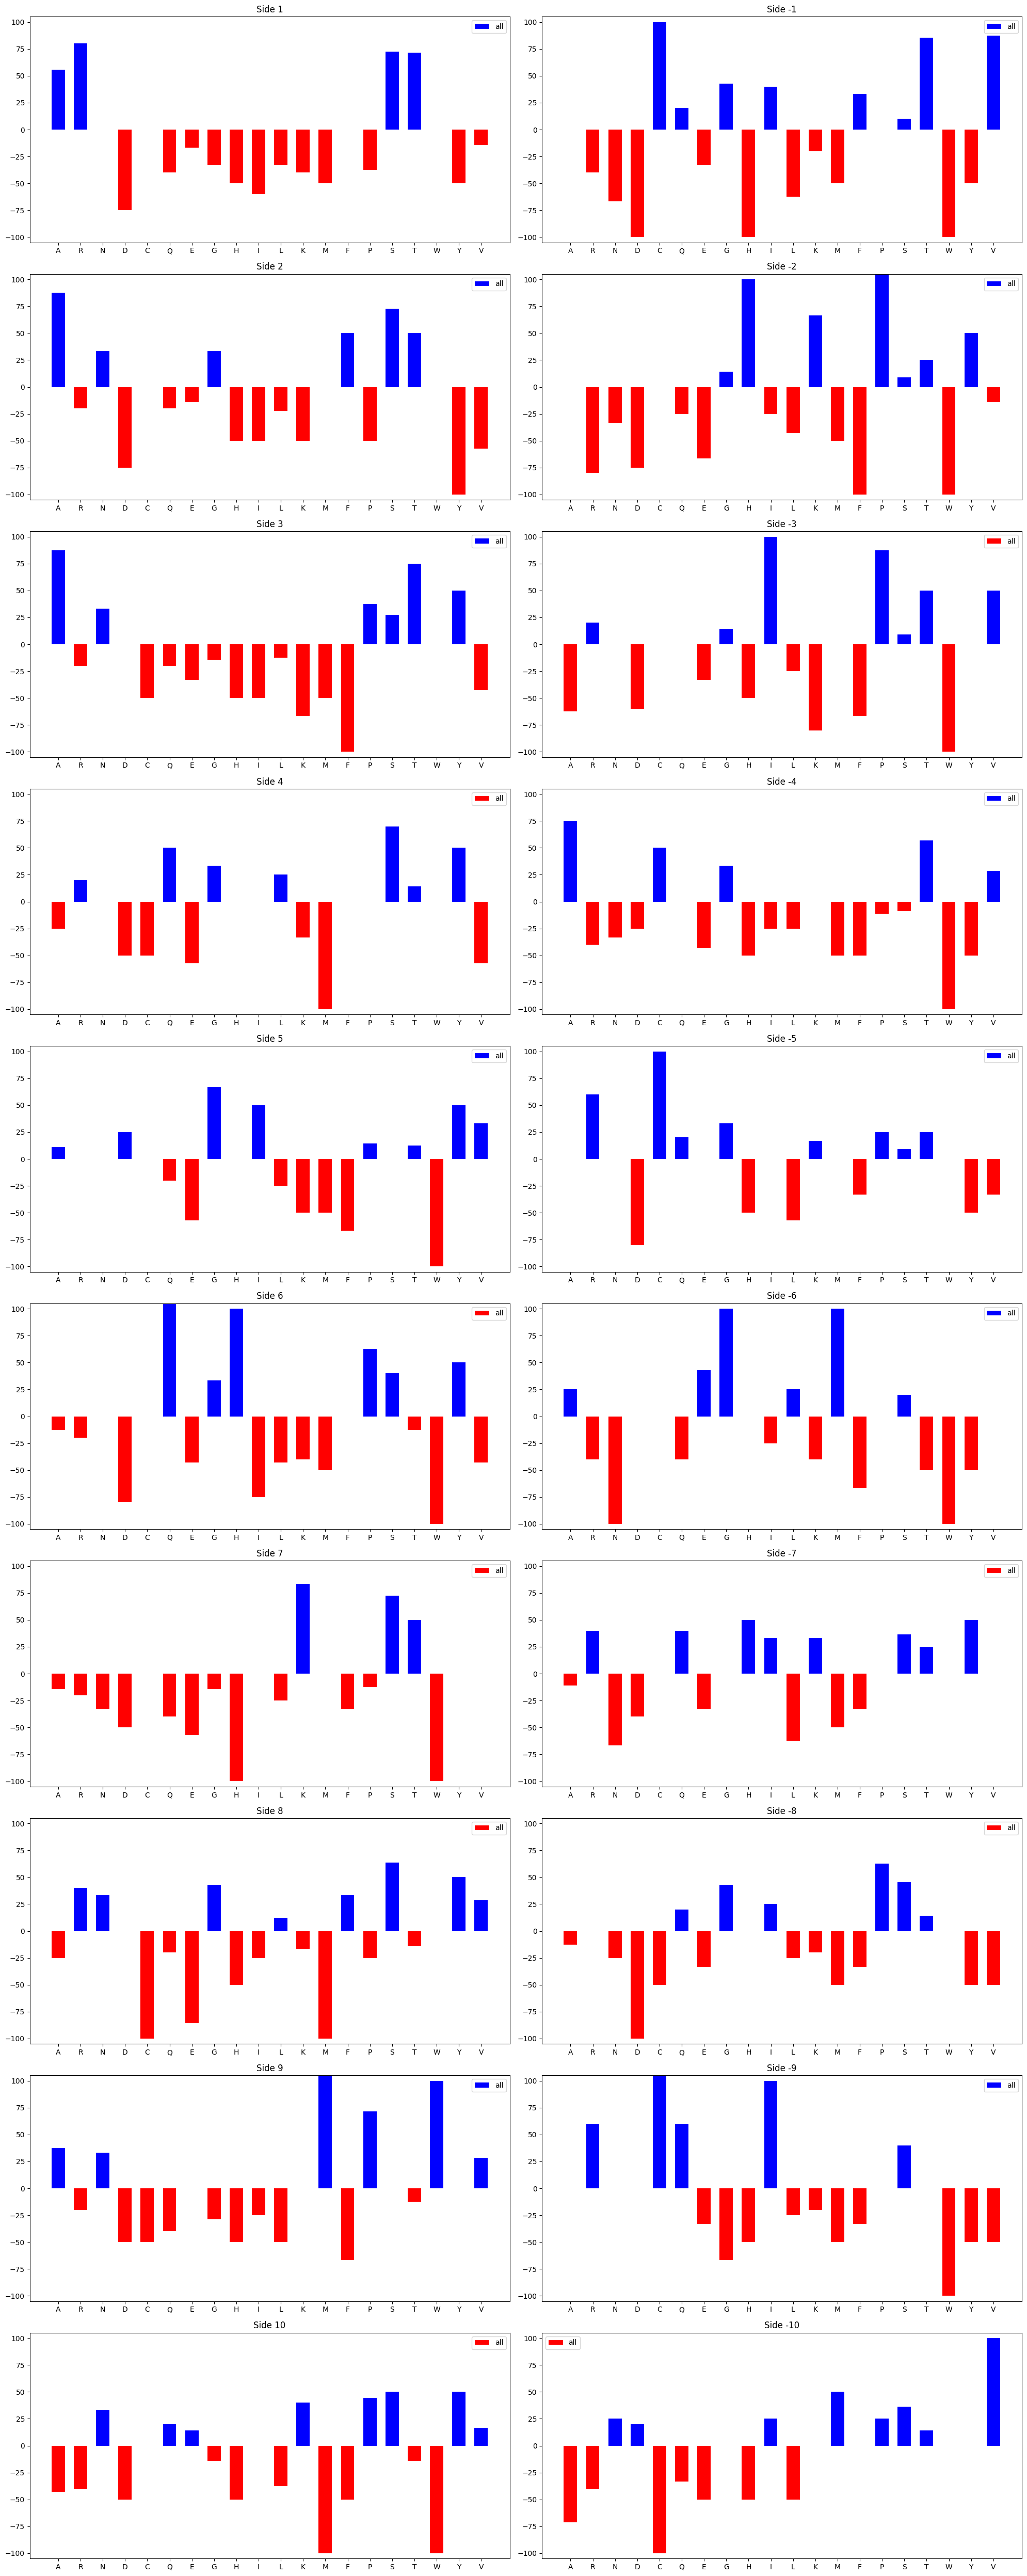

In [27]:
plt.figure(figsize=(10*2,5*10))

for side_num in range(1, 11):
    plt.subplot(10, 2, 2*side_num-1)
    plot_pos_neg_ratio(side_num, T_sides, T_pos_sides, T_neg_sides, (-105, 105))

    plt.subplot(10, 2, 2*side_num)
    plot_pos_neg_ratio(-side_num, T_sides, T_pos_sides, T_neg_sides, (-105, 105))
    
plt.tight_layout()
plt.show()

## augmented features

In [32]:
augmented_start_idx = all_columns.index('number_hydrophobic_0A')
augmented_end_idx   = all_columns.index('net_charge_sidechain_exposed_25A')
augmented_columns = all_columns[augmented_start_idx : augmented_end_idx + 1]

print('# of augmented features:', len(augmented_columns))

# statistics of augmented features
all_augmented = ST_all[augmented_columns]
all_augmented.dtypes.to_csv('./data/augmented_columns.csv')

pos_augmented = ST_pos[augmented_columns]
neg_augmented = ST_neg[augmented_columns]

all_stats = all_augmented.describe()
pos_stats = pos_augmented.describe()
neg_stats = neg_augmented.describe()

# of augmented features: 498


### 0 A

In [33]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '0A']

print(' '*54, '      mean      std      min      max ')
var_num_1 = 0
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
  0                              number_hydrophobic_0A :     0.00     0.00     0.00     0.00
  1                              number_hydrophilic_0A :     1.00     0.00     1.00     1.00
  2                                    number_polar_0A :     1.00     0.00     1.00     1.00
  3                                 number_aromatic_0A :     0.00     0.00     0.00     0.00
  4                                number_aliphatic_0A :     0.00     0.00     0.00     0.00
  5                                  number_charged_0A :     0.00     0.00     0.00     0.00
  6                                 number_positive_0A :     0.00     0.00     0.00     0.00
  7                                 number_negative_0A :     0.00     0.00     0.00     0.00
  8                                      number_gly_0A :     0.00     0.00     0.00     0.00
  9                               number_very_small_0A :     0.00    

In [34]:
print(' '*54, '       all      pos      neg    ratio(%) ')

var_num_2 = 0
for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
  0                              number_hydrophobic_0A :     0.00     0.00     0.00      nan
  1                              number_hydrophilic_0A :     1.00     1.00     1.00     0.00
  2                                    number_polar_0A :     1.00     1.00     1.00     0.00
  3                                 number_aromatic_0A :     0.00     0.00     0.00      nan
  4                                number_aliphatic_0A :     0.00     0.00     0.00      nan
  5                                  number_charged_0A :     0.00     0.00     0.00      nan
  6                                 number_positive_0A :     0.00     0.00     0.00      nan
  7                                 number_negative_0A :     0.00     0.00     0.00      nan
  8                                      number_gly_0A :     0.00     0.00     0.00      nan
  9                               number_very_small_0A :     0.00 

C:\Users\skyhong\AppData\Local\Temp\ipykernel_9772\2539756620.py:8: RuntimeWarning: invalid value encountered in scalar divide
  ratio_value = (pos_value - neg_value) / all_value * 100


### 5 A

In [35]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '5A']

print(' '*54, '      mean      std      min      max ')
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
 83                              number_hydrophobic_5A :     2.91     2.39     0.00    17.00
 84                              number_hydrophilic_5A :     4.58     2.18     1.00    19.00
 85                                    number_polar_5A :     2.88     1.41     1.00    11.00
 86                                 number_aromatic_5A :     0.50     0.86     0.00     6.00
 87                                number_aliphatic_5A :     2.40     2.14     0.00    17.00
 88                                  number_charged_5A :     1.70     1.59     0.00    11.00
 89                                 number_positive_5A :     0.96     1.08     0.00     8.00
 90                                 number_negative_5A :     0.74     0.93     0.00     6.00
 91                                      number_gly_5A :     0.41     0.69     0.00     6.00
 92                               number_very_small_5A :     1.00    

In [36]:
print(' '*54, '       all      pos      neg    ratio(%) ')

for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
 83                              number_hydrophobic_5A :     2.91     2.47     2.92   -15.73
 84                              number_hydrophilic_5A :     4.58     3.98     4.60   -13.63
 85                                    number_polar_5A :     2.88     2.86     2.88    -0.64
 86                                 number_aromatic_5A :     0.50     0.34     0.51   -32.63
 87                                number_aliphatic_5A :     2.40     2.18     2.40    -9.56
 88                                  number_charged_5A :     1.70     1.11     1.72   -35.67
 89                                 number_positive_5A :     0.96     0.69     0.97   -28.44
 90                                 number_negative_5A :     0.74     0.42     0.75   -44.99
 91                                      number_gly_5A :     0.41     0.40     0.41    -3.80
 92                               number_very_small_5A :     1.00 

### 10 A

In [37]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '10A']

print(' '*54, '      mean      std      min      max ')
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
166                             number_hydrophobic_10A :     8.12     8.07     0.00    47.00
167                             number_hydrophilic_10A :    10.19     6.90     1.00    41.00
168                                   number_polar_10A :     5.70     3.68     1.00    25.00
169                                number_aromatic_10A :     1.52     2.23     0.00    16.00
170                               number_aliphatic_10A :     6.70     6.98     0.00    45.00
171                                 number_charged_10A :     4.49     4.08     0.00    22.00
172                                number_positive_10A :     2.55     2.50     0.00    15.00
173                                number_negative_10A :     1.94     2.02     0.00    12.00
174                                     number_gly_10A :     1.07     1.46     0.00    19.00
175                              number_very_small_10A :     2.71    

In [38]:
print(' '*54, '       all      pos      neg    ratio(%) ')

for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
166                             number_hydrophobic_10A :     8.12     6.47     8.19   -21.11
167                             number_hydrophilic_10A :    10.19     8.31    10.26   -19.16
168                                   number_polar_10A :     5.70     5.27     5.71    -7.77
169                                number_aromatic_10A :     1.52     0.97     1.54   -37.50
170                               number_aliphatic_10A :     6.70     5.61     6.75   -16.97
171                                 number_charged_10A :     4.49     3.04     4.55   -33.61
172                                number_positive_10A :     2.55     1.84     2.58   -29.08
173                                number_negative_10A :     1.94     1.20     1.97   -39.59
174                                     number_gly_10A :     1.07     0.92     1.08   -15.08
175                              number_very_small_10A :     2.71 

### 15 A

In [39]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '15A']

print(' '*54, '      mean      std      min      max ')
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
249                             number_hydrophobic_15A :    16.32    16.51     0.00    96.00
250                             number_hydrophilic_15A :    19.92    15.61     1.00    86.00
251                                   number_polar_15A :    10.52     7.86     1.00    50.00
252                                number_aromatic_15A :     3.03     4.18     0.00    32.00
253                               number_aliphatic_15A :    13.62    14.45     0.00    92.00
254                                 number_charged_15A :     9.40     8.66     0.00    44.00
255                                number_positive_15A :     5.28     5.04     0.00    27.00
256                                number_negative_15A :     4.12     4.07     0.00    24.00
257                                     number_gly_15A :     2.26     2.80     0.00    27.00
258                              number_very_small_15A :     5.51    

In [ ]:
print(' '*54, '       all      pos      neg    ratio(%) ')

for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
249                             number_hydrophobic_15A :    16.32    12.79    16.45   -22.42
250                             number_hydrophilic_15A :    19.92    15.32    20.10   -23.97
251                                   number_polar_15A :    10.52     9.11    10.57   -13.91
252                                number_aromatic_15A :     3.03     1.86     3.07   -39.90
253                               number_aliphatic_15A :    13.62    11.34    13.71   -17.39
254                                 number_charged_15A :     9.40     6.21     9.52   -35.23
255                                number_positive_15A :     5.28     3.71     5.34   -31.01
256                                number_negative_15A :     4.12     2.51     4.18   -40.63
257                                     number_gly_15A :     2.26     2.01     2.27   -11.60
258                              number_very_small_15A :     5.51 

### 20 A

In [ ]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '20A']

print(' '*54, '      mean      std      min      max ')
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
332                             number_hydrophobic_20A :    27.05    26.44     0.00   150.00
333                             number_hydrophilic_20A :    33.32    26.74     2.00   157.00
334                                   number_polar_20A :    17.11    13.15     1.00    89.00
335                                number_aromatic_20A :     4.99     6.53     0.00    51.00
336                               number_aliphatic_20A :    22.61    23.12     0.00   146.00
337                                 number_charged_20A :    16.21    14.59     0.00    80.00
338                                number_positive_20A :     9.01     8.28     0.00    49.00
339                                number_negative_20A :     7.20     6.80     0.00    41.00
340                                     number_gly_20A :     3.88     4.50     0.00    39.00
341                              number_very_small_20A :     9.14    

In [ ]:
print(' '*54, '       all      pos      neg    ratio(%) ')

for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
332                             number_hydrophobic_20A :    27.05    21.14    27.28   -22.71
333                             number_hydrophilic_20A :    33.32    24.98    33.64   -25.97
334                                   number_polar_20A :    17.11    14.16    17.22   -17.88
335                                number_aromatic_20A :     4.99     3.00     5.06   -41.38
336                               number_aliphatic_20A :    22.61    18.59    22.76   -18.46
337                                 number_charged_20A :    16.21    10.82    16.41   -34.52
338                                number_positive_20A :     9.01     6.29     9.11   -31.33
339                                number_negative_20A :     7.20     4.53     7.30   -38.51
340                                     number_gly_20A :     3.88     3.27     3.90   -16.33
341                              number_very_small_20A :     9.14 

### 25 A

In [ ]:
columns = [x for x in all_stats.columns if x.split('_')[-1] == '25A']

print(' '*54, '      mean      std      min      max ')
for key, value in zip(columns, [list(all_stats.loc[['mean', 'std', 'min', 'max'], x].values.round(2)) for x in columns]):
    print(f'{var_num_1:>3} {key:>50} : {value[0]:>8.2f} {value[1]:>8.2f} {value[2]:>8.2f} {value[3]:>8.2f}')
    var_num_1 += 1

                                                             mean      std      min      max 
415                             number_hydrophobic_25A :    40.35    36.69     0.00   216.00
416                             number_hydrophilic_25A :    50.67    39.23     2.00   232.00
417                                   number_polar_25A :    25.68    19.00     1.00   131.00
418                                number_aromatic_25A :     7.28     8.98     0.00    64.00
419                               number_aliphatic_25A :    33.73    32.08     0.00   212.00
420                                 number_charged_25A :    24.99    21.43     0.00   114.00
421                                number_positive_25A :    13.79    11.98     0.00    67.00
422                                number_negative_25A :    11.19    10.00     0.00    57.00
423                                     number_gly_25A :     5.94     6.35     0.00    52.00
424                              number_very_small_25A :    13.65    

In [ ]:
print(' '*54, '       all      pos      neg    ratio(%) ')

for column in columns:
    all_value   = all_stats.loc['mean'][column]
    pos_value   = pos_stats.loc['mean'][column]
    neg_value   = neg_stats.loc['mean'][column]
    ratio_value = (pos_value - neg_value) / all_value * 100
    
    print(f'{var_num_2:>3} {column:>50} : {all_value:>8.2f} {pos_value:>8.2f} {neg_value:>8.2f} {ratio_value:>8.2f}')
    
    var_num_2 += 1

                                                              all      pos      neg    ratio(%) 
415                             number_hydrophobic_25A :    40.35    31.74    40.68   -22.17
416                             number_hydrophilic_25A :    50.67    37.79    51.16   -26.39
417                                   number_polar_25A :    25.68    21.11    25.86   -18.47
418                                number_aromatic_25A :     7.28     4.36     7.39   -41.63
419                               number_aliphatic_25A :    33.73    27.72    33.96   -18.51
420                                 number_charged_25A :    24.99    16.68    25.31   -34.53
421                                number_positive_25A :    13.79     9.60    13.95   -31.57
422                                number_negative_25A :    11.19     7.08    11.35   -38.18
423                                     number_gly_25A :     5.94     5.00     5.97   -16.45
424                              number_very_small_25A :    13.65 